In [5]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
import numpy as np
import os
import sys
import pandas as pd

In [6]:
(train_features, train_labels), (test_features, test_labels) = keras.datasets.boston_housing.load_data()

# get per-feature statistics (mean, standard deviation) from the training set to normalize by
train_mean = np.mean(train_features, axis=0)
train_std = np.std(train_features, axis=0)
train_features = (train_features - train_mean) / train_std

In [7]:


def build_model():
    model = keras.Sequential([
        Dense(20, activation=tf.nn.relu, input_shape=[len(train_features[0])]),
        Dense(1)
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(), 
                  loss='mse',
                  metrics=['mae', 'mse'])
    return model



In [8]:
# this helps makes our output less verbose but still shows progress
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

model = build_model()

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)
history = model.fit(train_features, train_labels, epochs=1000, verbose=1, validation_split = 0.1,
                    callbacks=[early_stop, PrintDot()])

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# show RMSE measure to compare to Kaggle leaderboard on https://www.kaggle.com/c/boston-housing/leaderboard
#rmse_final = np.sqrt(float(hist['val_mean_squared_error'].tail(1)))
#print()
#print('Final Root Mean Square Error on validation set: {}'.format(round(rmse_final, 3)))

Epoch 1/1000
12/12 [==============================] - 1s 20ms/step - loss: 612.7312 - mae: 22.8250 - mse: 612.7312 - val_loss: 515.0717 - val_mae: 21.7003 - val_mse: 515.0717

.Epoch 2/1000
12/12 [==============================] - 0s 8ms/step - loss: 601.7560 - mae: 22.6091 - mse: 601.7560 - val_loss: 505.6905 - val_mae: 21.4972 - val_mse: 505.6905
.Epoch 3/1000
12/12 [==============================] - 0s 9ms/step - loss: 591.2601 - mae: 22.4030 - mse: 591.2601 - val_loss: 496.9001 - val_mae: 21.3092 - val_mse: 496.9001
.Epoch 4/1000
12/12 [==============================] - 0s 8ms/step - loss: 581.3957 - mae: 22.2018 - mse: 581.3957 - val_loss: 488.4322 - val_mae: 21.1200 - val_mse: 488.4322
.Epoch 5/1000
12/12 [==============================] - ETA: 0s - loss: 567.8510 - mae: 21.9320 - mse: 567.85 - 0s 8ms/step - loss: 571.5530 - mae: 21.9989 - mse: 571.5530 - val_loss: 480.0450 - val_mae: 20.9247 - val_mse: 480.0450
.Epoch 6/1000
12/12 [==============================] - 0s 9ms/step -

KeyError: 'mean_squared_error'

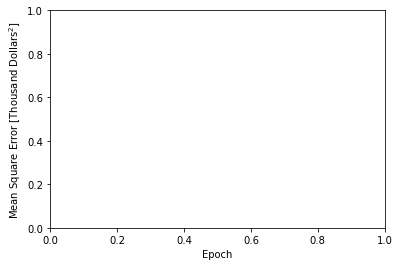

In [9]:
def plot_history():
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [Thousand Dollars$^2$]')
    plt.plot(hist['epoch'], hist['mean_squared_error'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_squared_error'], label = 'Val Error')
    plt.legend()
    plt.ylim([0,50])

plot_history()

In [ ]:
test_features_norm = (test_features - train_mean) / train_std
mse, _, _ = model.evaluate(test_features_norm, test_labels)
rmse = np.sqrt(mse)
print('Root Mean Square Error on test set: {}'.format(round(rmse, 3)))

Compare the RMSE measure you get to the Kaggle leaderboard. An RMSE of 2.651 puts us in 5th place.
